<h1 align="center"> Support Vector Machines</h1>

SVMs are a powerful class of supervised learning algorithms for classification and regression problems. In the context of classification, SVMs can be viewed as maximum margin linear classifiers. 

The SVM uses an objective which explicitly encourages low out-of-sample error (good generalization performance). The $D$ dimensional data are divided into classes by maximizing the margin between the hyperplanes for the classes.

Note that we assume the two classes in the data are linearly separable. Later, for non-linear boundaries, we will use the kernel trick to exploit higher (possibly infinite) dimensional $z$-spaces, where the classes are linearly separable, find the support vectors in this space and map it back to the dimensionality of our problem.

## Linearly separable classes:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

# all outputs generated in the notebo
%matplotlib inline 

# for advanced plot styling
import seaborn as sns; sns.set()
plt.rcParams['figure.dpi'] = 90

C:\Users\Dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


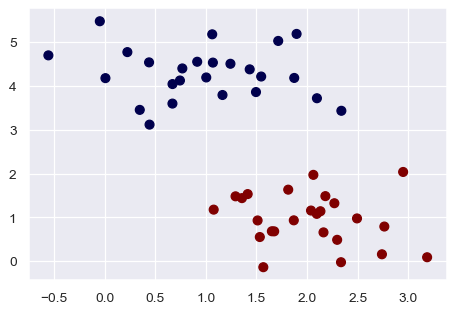

In [2]:
# creating a synthetic dataset of two linearly separable variables
from sklearn.datasets.samples_generator import make_blobs

X, y = make_blobs(n_samples=50, centers=2,
                 random_state=0, cluster_std=0.6)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="seismic");

The linear classifiers we know will draw a straight line between the classes. With this example, we could do this by hand. But what should strike you is that there is more than one decision boundary (lines) that can achieve minimum in-sample error.  Let's plot them below.

## Many possible separators:

(-1, 3.5)

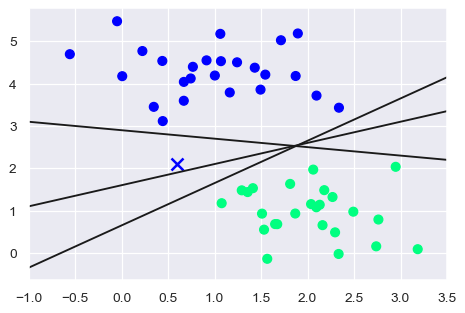

In [3]:
xfit = np.linspace(-1, 3.5, 50)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.plot([0.6], [2.1], 'x', c='blue', markeredgewidth=2, markersize=10)

for slope, intercept in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    yfit = slope*xfit + intercept
    plt.plot(xfit, yfit, '-k')
    
plt.xlim(-1, 3.5)    

## Maximum margin linear classifiers:

For a hyperplane defined by weight $w$ and bias $b$, a linear discriminant is given by:

$$w^T x + b \left\{\begin{matrix} \geq 0\ class +1& \\ <0\ class -1 \end{matrix}\right.$$

In the above plot, we notice that for a point $x$ that is close the decision boundary at $w^T x +b =0$, a small change in $x$ can lead to a change in classification. Now assuming that the data is linearly separable, we impose that for the training data, the decision boundary should be separated from the data by some finite amount $\epsilon ^2$:

$$w^T x + b \left\{\begin{matrix} \geq \epsilon^2\ class +1& \\ <-\epsilon^2\ class -1 \end{matrix}\right.$$

For the inequality above, we conveniently set $\epsilon = 1$ so that a point $x_+$ from class +1 that is closest to the decision boundary satisfies

 $$w^T x_+ + b =1$$

and a point $x_-$ from class -1 that is closest to the decision boundary satisfies

 $$w^T x_- + b =-1$$

## Plotting the margins:

(-1, 3.5)

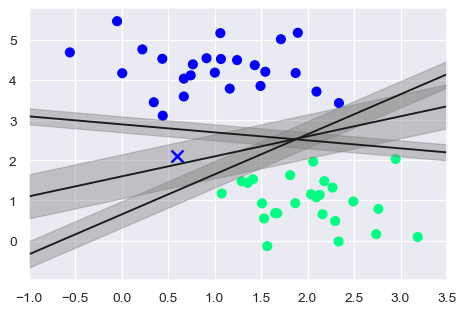

In [4]:
xfit = np.linspace(-1, 3.5, 50)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='winter')
plt.plot([0.6], [2.1], 'x', c='blue', markeredgewidth=2, markersize=10)

for slope, intercept, marginwidth in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = slope*xfit + intercept
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - marginwidth, yfit + marginwidth,
                    edgecolor='none', alpha=0.4, color="grey")
    
plt.xlim(-1, 3.5) 

When using SVMs, the decision boundary that maximizes this *margin* is chosen as the optimal model. 

## (Optional) What is the (hard) margin?

From vector algebra the distance from the origin along the direction $w$ to a point $x$ is given by

$$\frac{w^T x}{\sqrt{w^T w}}$$

The $margin$ between the hyperplanes for the classes is the difference between the two distances along the direction of $w$ which is

$$\frac{w^T x}{\sqrt{w^T w}}(x_+ - x_-) = \frac{2}{\sqrt{w^T w}}$$

To maximize the the distance between two hyperplanes, we need to minimise the length $w^T w$. We know that for each $x^n$ we have a corresponding class label $y^n \in \left \{ +1, -1 \right \}$. So to classify the training labels correctly and maximize this margin, the optimzation problem is equivalent to:

$minimize\ \frac{1}{2}w^Tw$ subject to the constraints  $y^n(w^Tx^n +b)\geq 1$, and $n =1,..., N.$

Notice that this formulation is a *quadratic programming* problem -- something we know how to work with. This is known as a hard margin SVM  due to the presence of the exact classification constraint "$\geq 1$", which means that the points used as support vectors exactly fall on the boundary of the margin.

# SVM in practice:

Using the data from before, let us now train an SVM model with Scikit-Learn's suppport vector classifier. We'll defer the discussion about kernels for later in the course. For the time being, we will use a `linear` kernel and set the `C` parameter to an arbitrarily large number.

In [5]:
from sklearn.svm import SVC

classifier = SVC(C=1e10, kernel='linear')
classifier.fit(X,y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

## Visualizing the SVM decision boundaries:

In [6]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca() # creates an Axes instance
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate classifier
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

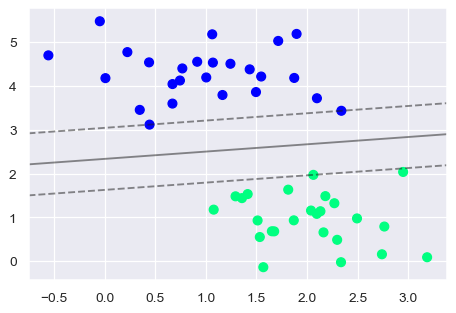

In [7]:
plt.scatter(X[:, 0], X[:, 1], s=50, c=y, cmap='winter')
plot_svc_decision_function(classifier)

The bold line dividing the data maximizes the margin between the two sets of points. Count the number of training points just touching the margin. These three points are known as the *support vectors*. These points exactly satisfying the margin are stored in the `support_vectors_` attribute of the classifier in Scikit-Learn.

In [8]:
# coordinates of the support vectors

classifier.support_vectors_ 

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

## Example: Face Recognition

In [12]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60, color=False)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Junichiro Koizumi' 'Tony Blair']
(1277, 62, 47)


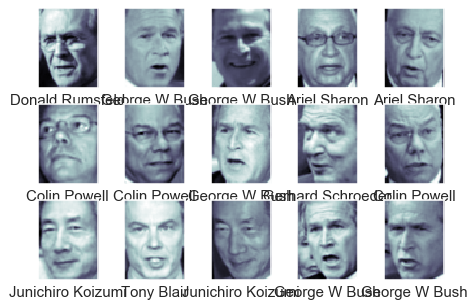

In [22]:
# we have 1277 images with 62x47 pixels

fig, ax = plt.subplots(3,5)

for i, axis in enumerate(ax.flat):
    axis.imshow(faces.images[i], cmap='bone')
    axis.set(xticks=[], yticks=[],
           xlabel=faces.target_names[faces.target[i]])


In [29]:
# we need to use PCA to reduce features to only the relevant ones

from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

pca = PCA(n_components=15, whiten=True, random_state=42)
classifer = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, classifier)

In [31]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target,
                                                   random_state=42) 

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [1, 5, 15, 10, 50],
                'gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(classifier, param_grid, n_jobs=-1, verbose=2)
%time grid.fit(X_train, y_train)
print(grid.cv_results_)
print(grid.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   50.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished


Wall time: 2min 30s
{'mean_fit_time': array([4.1302361 , 4.1450285 , 4.15162101, 4.26355782, 4.38081017,
       4.99022694, 5.12960558, 5.2328496 , 5.49992871, 5.05240712,
       4.95196252, 4.90970573, 5.04706759, 4.9987937 , 4.89939446,
       4.929708  , 4.93102431, 4.8416594 , 4.86421413, 4.88549261]), 'std_fit_time': array([0.04269234, 0.06080474, 0.08336062, 0.06133363, 0.28244161,
       0.12698077, 0.11413512, 0.11178464, 0.22518702, 0.17866726,
       0.06788371, 0.08675   , 0.09585846, 0.10362276, 0.16166722,
       0.06613203, 0.06959912, 0.09493415, 0.10277441, 0.08203355]), 'mean_score_time': array([0.8737021 , 0.87369967, 0.8689034 , 0.86350627, 1.05505247,
       1.04892993, 1.18582368, 1.13054929, 1.15680594, 1.06838293,
       1.00233669, 0.99273558, 1.06631408, 1.0369031 , 0.98637333,
       0.99030533, 1.02396936, 1.06595182, 1.0092308 , 0.87464871]), 'std_score_time': array([0.00511298, 0.01505831, 0.01721336, 0.01333542, 0.02407571,
       0.06105097, 0.07016279, 0

In [45]:
estimator = grid.best_estimator_
yhat = estimator.predict(X_test)

Text(0.5, 0.98, 'Identified faces, wrongly identified in red.')

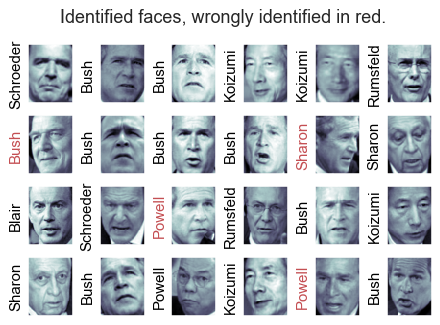

In [49]:
fig, ax = plt.subplots(4, 6)
for i, axis in enumerate(ax.flat):
    axis.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axis.set(xticks=[], yticks=[])
    axis.set_ylabel(faces.target_names[yhat[i]].split()[-1],
                    color='black' if yhat[i] == y_test[i] else 'r')

fig.suptitle("Identified faces, wrongly identified in red.")
    
    

In [52]:
from sklearn.metrics import classification_report, confusion_matrix

cr = classification_report(y_test, yhat, target_names=faces.target_names)
print(cr)

                   precision    recall  f1-score   support

     Ariel Sharon       0.67      0.62      0.64        13
     Colin Powell       0.81      0.79      0.80        66
  Donald Rumsfeld       0.69      0.67      0.68        30
    George W Bush       0.87      0.90      0.89       139
Gerhard Schroeder       0.95      0.79      0.86        24
Junichiro Koizumi       0.76      0.94      0.84        17
       Tony Blair       0.87      0.87      0.87        31

         accuracy                           0.83       320
        macro avg       0.80      0.80      0.80       320
     weighted avg       0.84      0.83      0.83       320



Text(111.97500000000002, 0.5, 'Predicted Label')

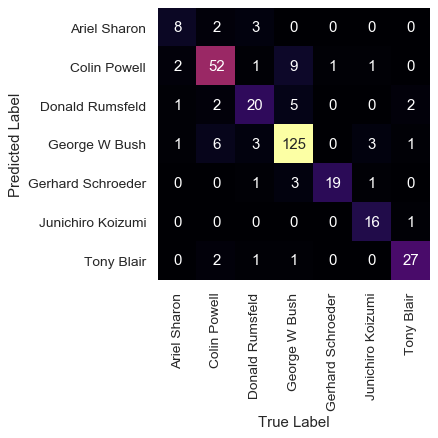

In [56]:
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm, square=True, annot=True, fmt='d',
           cbar=False, cmap='inferno', xticklabels=faces.target_names,
           yticklabels=faces.target_names)
plt.xlabel('True Label')
plt.ylabel('Predicted Label')